# Author : CHINMAYI S S, DATA SCIENCE INTERN

## TASK4 - SALES PREDICTION

#### CODSOFT INTERNSHIP23

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

In [4]:
#Importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
df = pd.read_csv("advertising.csv")

# Data Inspection

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


This dataset contains 200 entries and 4 columns

# Handling Missing Values

In [10]:
#Check for null/missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

This dataset contains no null values

In [11]:
#Check for duplicates
len(df[df.duplicated()])

0

This dataset contains no duplicates

In [12]:
#statistical description of the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
#Dependent and Independent features
X=df.drop(['Sales'], axis=1)
y=df['Sales']

In [14]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# EXPLORATORY DATA ANALYSIS (EDA)

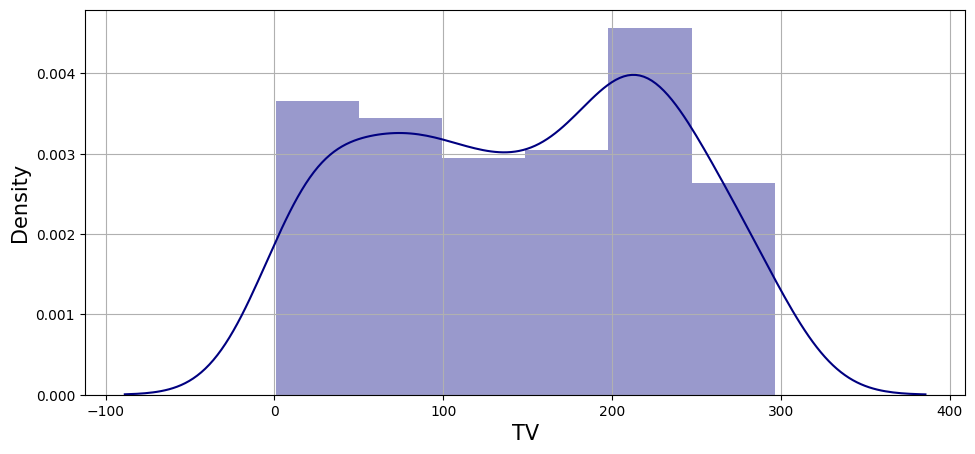

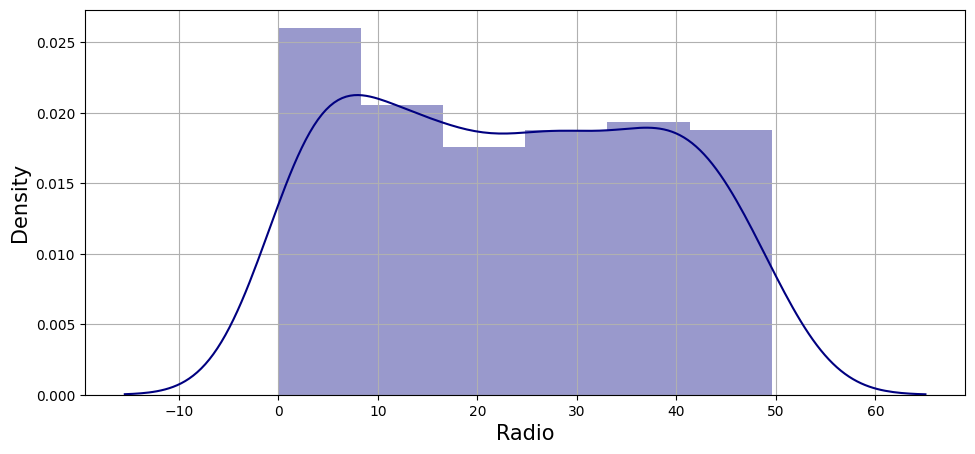

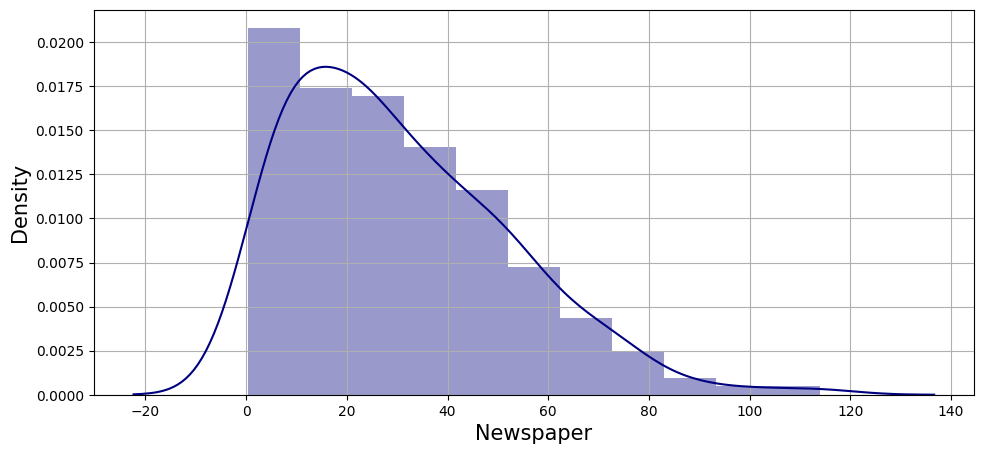

In [16]:
# Visualisation of skewness of the independent variable dataset.
for labels in X:
    plt.figure(figsize=(25,5))
    plt.subplot(1,2,2)
    fig = sns.distplot(df[labels],color='navy')
    fig.set_ylabel('Density',fontsize=15)
    fig.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

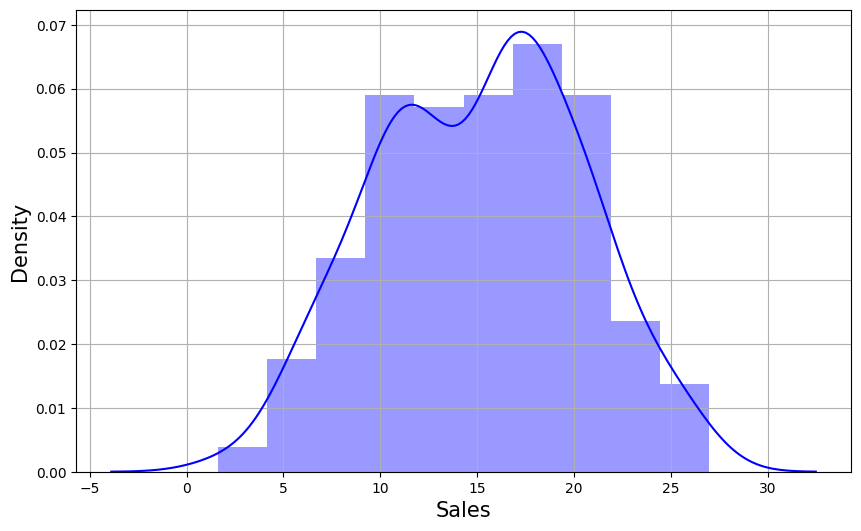

In [17]:
# Visualisation of skewness of the dependent variable dataset.
plt.figure(figsize=(10,6))
vis = sns.distplot(y,color='blue')
vis.set_ylabel('Density',fontsize=15)
vis.set_xlabel('Sales',fontsize=15)
plt.grid()
plt.show()

In [18]:
#Correlation
#df.corr()

<Axes: >

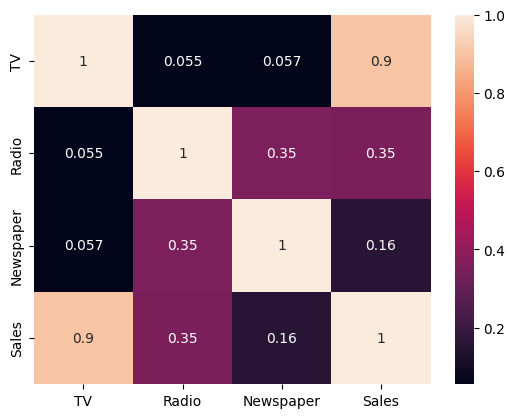

In [19]:
#Plotting correlation
sns.heatmap(df.corr(), annot=True)

## Only 'TV' variable is highly correlated to the dependent variable 'sales'

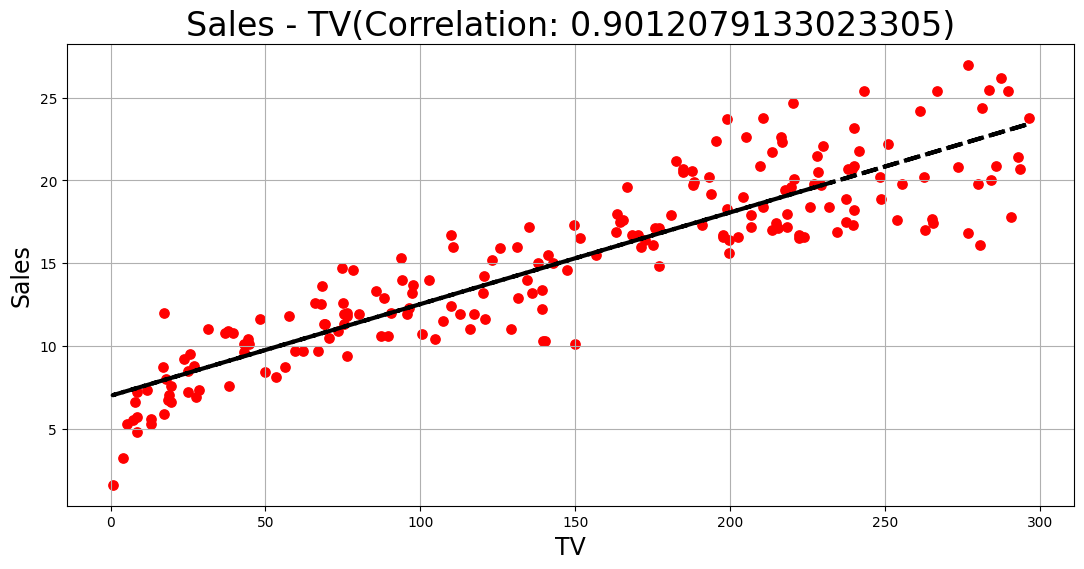

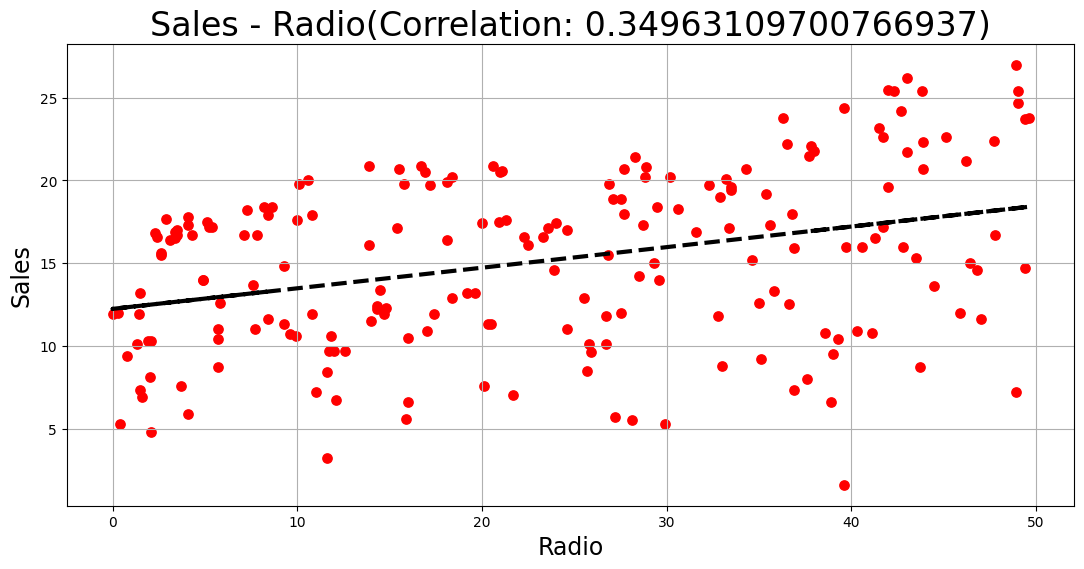

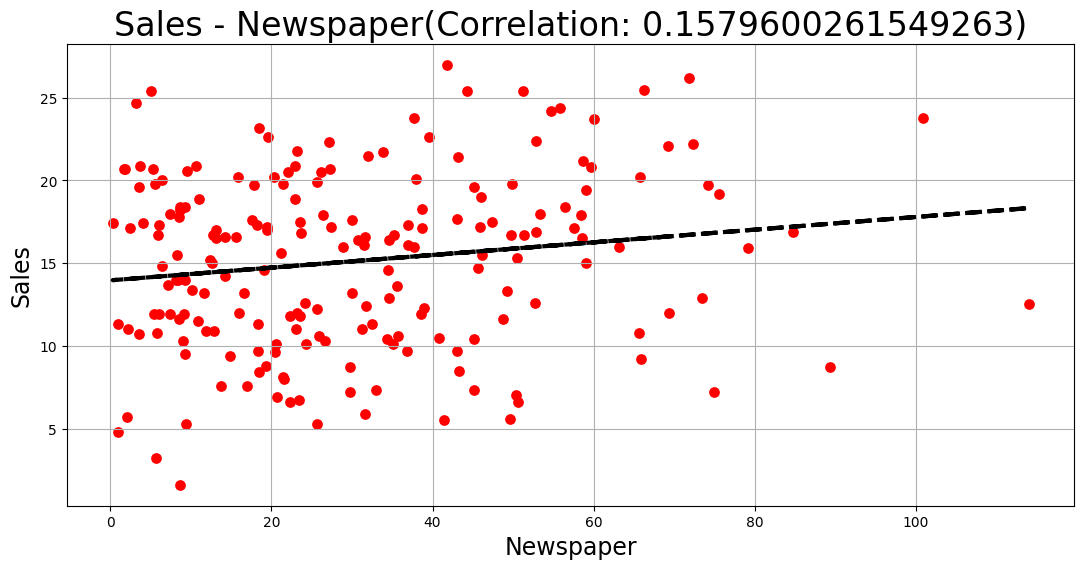

In [20]:
# Bivariate analysis.
for labels in X:
   fig = plt.figure(figsize=(13,6))
   ax = fig.gca()
   feature = df[labels]
   label = df['Sales']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label,s=45,color='r')
   plt.xlabel(labels,fontsize=17)
   plt.ylabel('Sales',fontsize=17)
   ax.set_title('Sales - ' + labels + '(' + 'Correlation: ' + str(correlation) + ')',fontsize=24)
   z = np.polyfit(df[labels], df['Sales'], 1)
   y_hat = np.poly1d(z)(df[labels])
 
   plt.plot(df[labels], y_hat, "r--", lw=3,color = 'black')
   plt.grid()


plt.show()

In [22]:
# Multicollinearity detection.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["Variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

calc_vif(X)

,Variables,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


###### Since all the variables are equally important in order to understand which is contributing more , so i'll not be removing any

In [23]:
# Dataframe to store metrics.
i = 0
eval_metric = pd.DataFrame()

# Train Test Split

In [24]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
X_train_scaler=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [28]:
#Check the data shape
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


# MODEL TRAINING

## 1. LINEAR REGRESSION

In [29]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [30]:
#Fitting your train datasets to linear regression algorithm
regression.fit(X_train_scaler,y_train)

LinearRegression()

In [31]:
#Print the coefficients and intercept
print(regression.coef_)
print(regression.intercept_)

[4.58720774 1.48984025 0.08791597]
15.330625000000003


In [32]:
#Prediction with test data
reg_pred=regression.predict(X_test)

In [33]:
reg_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

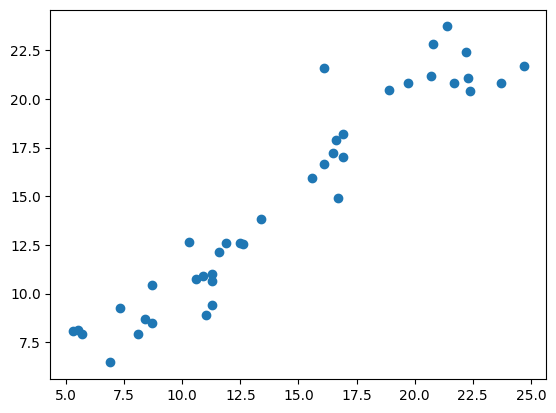

In [34]:
#Plotting a scatter plot w.r.t prediction
plt.scatter(y_test,reg_pred)

In [35]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error((y_test), (reg_pred))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred))
print("R_squared :" ,R_squared)

MAE: 1.2748262109549349
MSE : 2.9077569102710923
RMSE : 1.7052146229349232
R_squared : 0.9059011844150826


In [36]:
#display adjusted R-squared
1 - (1-R_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8980596164496728

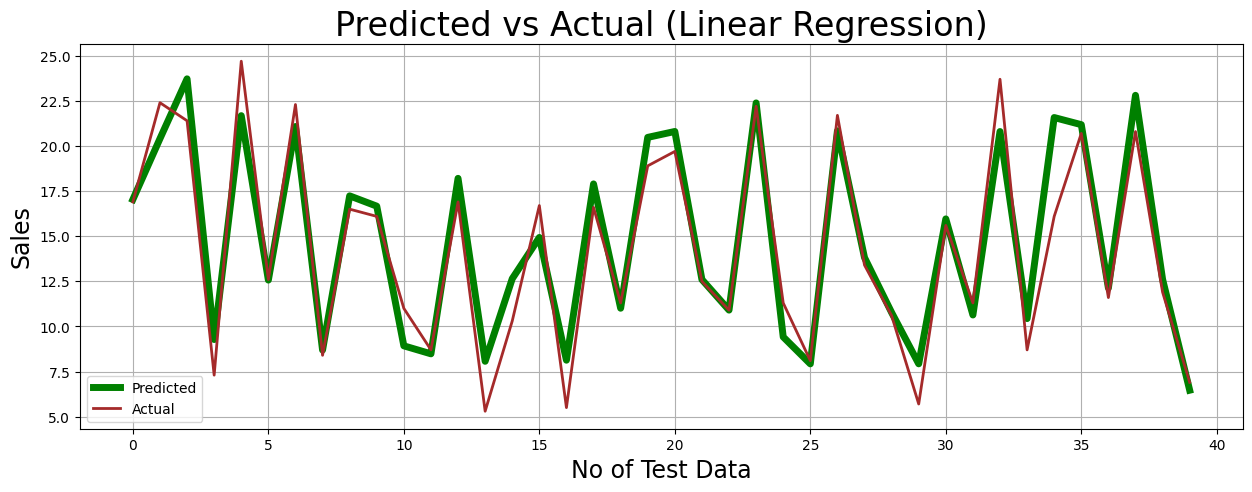

In [37]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred,color='green',linewidth=5)
plt.plot(np.array(y_test),color='brown',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Sales',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred = Predicted values
# y_test = Actual values

In [38]:
# Inserting Linear Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Linear regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

# 2. RIDGE REGRESSION

##### (L2 REGULARIZATION)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
# Fitting data into Ridge Regression algorithm.
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train_scaler,y_train)

Ridge(alpha=0.1)

In [41]:
# Cross validation.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaler,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [42]:
print("Best fit alpha value :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

Best fit alpha value : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -2.740190162571438


In [43]:
# Predicted values.
reg_pred_ridge = ridge_regressor.predict(X_test)
reg_pred_ridge

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [44]:
#Evaluation metrics
MAE = mean_absolute_error((y_test), (reg_pred_ridge))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred_ridge))
print("R_squared :" ,R_squared)

MAE: 1.2748262109549344
MSE : 2.9077569102710927
RMSE : 1.7052146229349234
R_squared : 0.9059011844150825


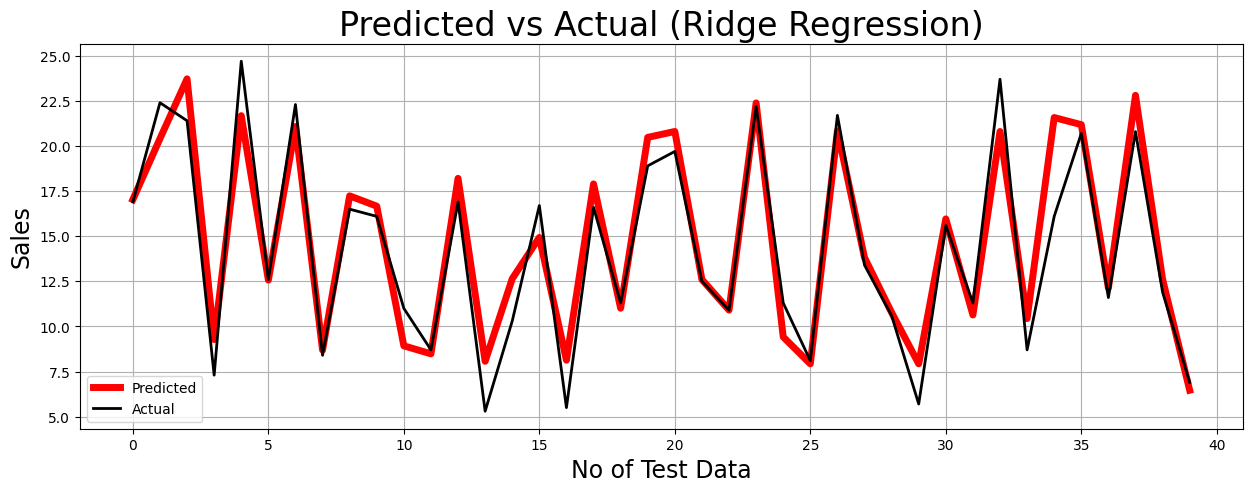

In [45]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred_ridge,color='red',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Sales',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred_ridge = Predicted values
# y_test = Actual values

In [46]:
# Inserting Ridge Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Ridge regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

# 3.LASSO REGRESSION

#### (L1 REGULARIZATION)

In [47]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001, max_iter=3000)

In [48]:
lasso.fit(X_train_scaler,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [49]:
# Cross validation.
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train_scaler,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [50]:
print("Best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -2.7172092434033437


In [51]:
# Predicted values.
reg_pred_lasso = lasso_regressor.predict(X_test)
reg_pred_lasso

array([17.02114306, 20.38521052, 23.70066907,  9.27663408, 21.67251546,
       12.56427151, 21.06513058,  8.7108622 , 17.24364329, 16.66335667,
        8.94647134,  8.50018095, 18.18720243,  8.08799954, 12.65727802,
       14.93428544,  8.13782318, 17.89881477, 11.0175001 , 20.47312452,
       20.77729698, 12.57194043, 10.91640182, 22.35588878,  9.44360723,
        7.94845103, 20.8214464 , 13.82724732, 10.78435304,  7.95080206,
       15.96612983, 10.6492658 , 20.77469441, 10.41876573, 21.5652512 ,
       21.1773119 , 12.13645862, 22.78222577, 12.62608394,  6.49116383])

In [52]:
#Evaluation metrics
MAE = mean_absolute_error((y_test), (reg_pred_lasso))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred_lasso))
print("R_squared :" ,R_squared)

MAE: 1.2725128416472888
MSE : 2.907126560111195
RMSE : 1.7050297827636898
R_squared : 0.9059215833704563


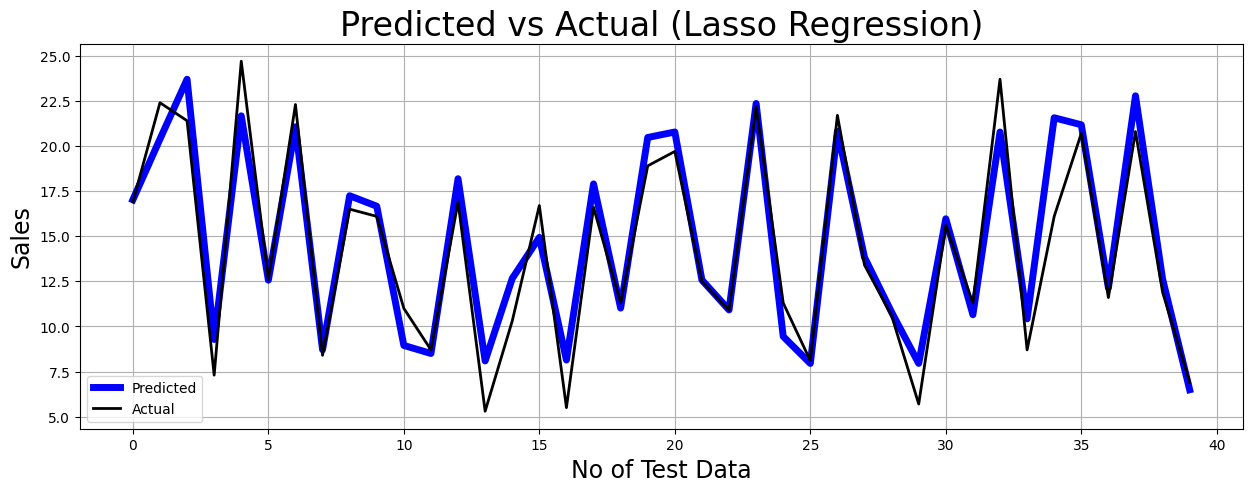

In [53]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred_lasso,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Sales',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred_lasso = Predicted values
# y_test = Actual values

In [54]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Lasso regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

In [55]:
#COMPARISON BY METRICS

eval_metric

,Model_Name,MAE,MSE,RMSE,R_squared
0,Linear regression,1.2748,2.9078,1.7052,0.9059
1,Ridge regression,1.2748,2.9078,1.7052,0.9059
2,Lasso regression,1.2725,2.9071,1.7050,0.9059


In [56]:
# Downloading model.
import pickle
pickle.dump(lasso, open('./model.pkl', 'wb'))

# Conclusion:

-> The accuracy for each model is above 90%

-> Out all the models Lasso model is giving the best r_sccore value along with low MAE,MSE and RMSE values

-> Independent variable 'TV'(input variable) have a very high influence on dependent variable(target variable) and it is highly correlated to target variable